<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [5]:
import numpy as np

np.random.rand()                # Give one number

0.4375601878073232

In [5]:
np.random.rand(7)

array([0.95221559, 0.19389894, 0.95592722, 0.94406709, 0.83664583,
       0.13798075, 0.59529004])

In [6]:
np.random.rand(4,3)

array([[0.91667727, 0.95793595, 0.32957556],
       [0.35717752, 0.59307169, 0.97328608],
       [0.17305548, 0.86819723, 0.76362699],
       [0.32576997, 0.46236527, 0.72254643]])

### 1.2 NumPy’s PRNG

In [ ]:

# Your code here


### 1.3 A simple graphical test

In [1]:
from matplotlib import pyplot as plt

n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

NameError: name 'np' is not defined

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

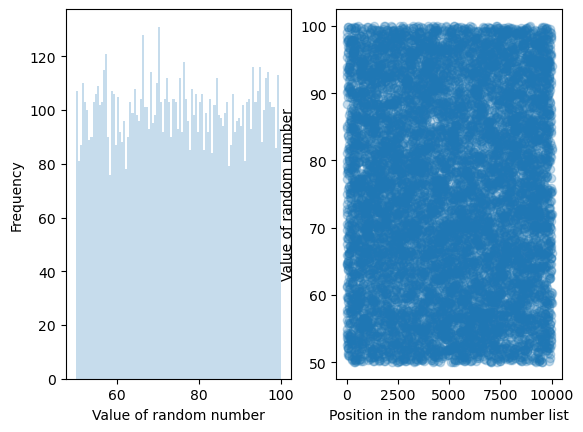

In [9]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [10]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [11]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [13]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: As I see it, yes.

Q: Will I be rich?
A: My reply is no.

Q: Will I be in trouble?
A: Signs point to yes.



## 3 Flipping Coins

### 3.1 A fair coin

In [14]:
np.random.choice(['Head', 'Tails'])

'Tails'

In [15]:
no_of_coins = 8
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Head', 'Head', 'Tails', 'Head', 'Head', 'Tails', 'Head', 'Tails'],
      dtype='<U5')

In [7]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 52.10%


### 3.2 A biased coin

In [8]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 70.50%


### 3.3 A flipping experiment

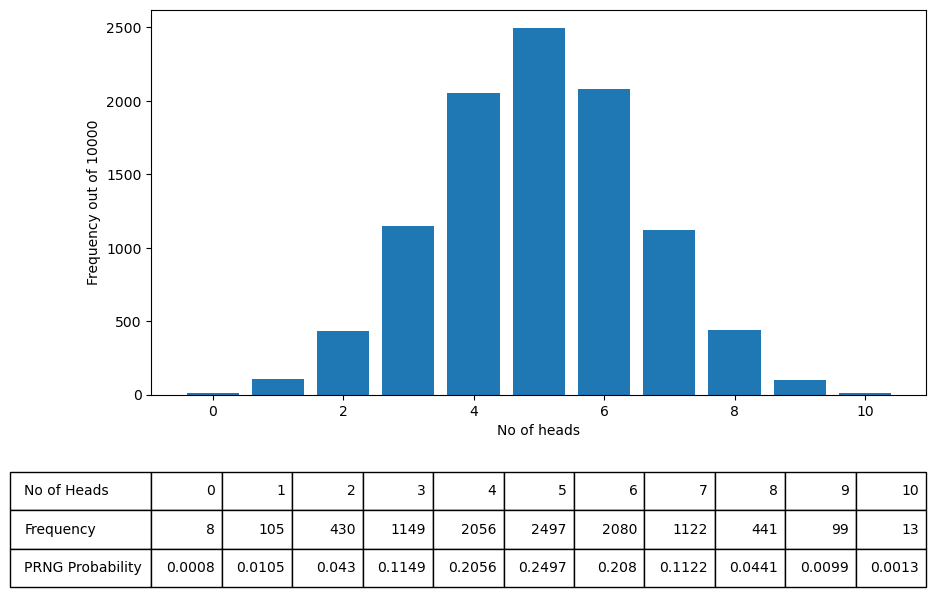

In [9]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

heads_probability = heads_counts/no_of_repeats

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

## Exercise 1 :  12C, 13C

In [11]:
def carbon(C=27, probability=.9889):
    
    results = np.random.rand(C)
    C13 = np.sum(results > probability)
    return C13

C = 27
C13 = carbon(C, probability = .9889)

result = [carbon(C=27) for _ in range(100)]

print(np.mean(result))
print(np.std(result))

0.22
0.5015974481593781


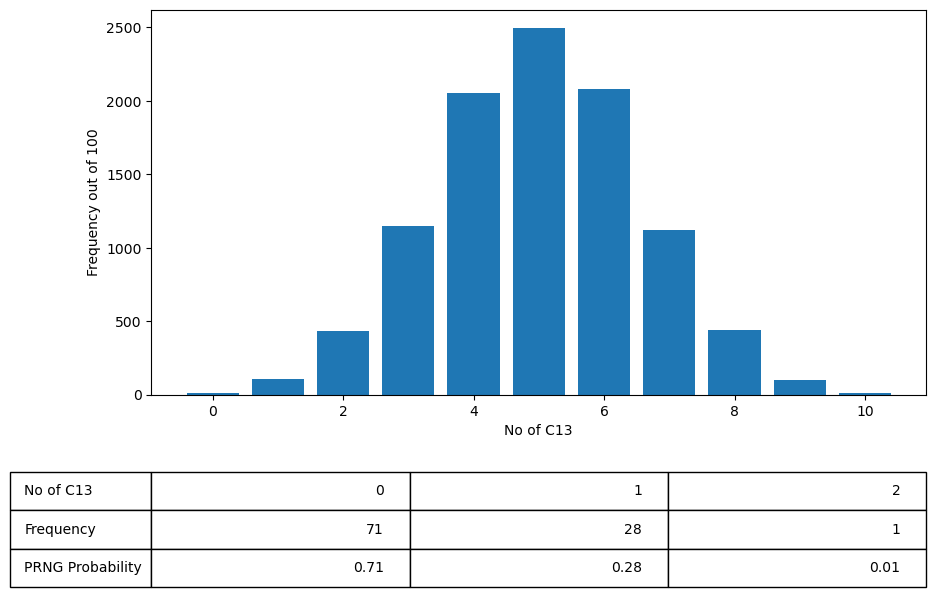

In [15]:
result = [carbon(C=27) for _ in range(100)]
no_of_C13, C13_count = np.unique(result, return_counts=True)

C13_probability = C13_count/100

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of C13')
plt.ylabel('Frequency out of 100')
plt.table([no_of_C13, C13_count, C13_probability],
          rowLabels=['No of C13', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])